In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/ESAA/미니 프로젝트(2)')
os.getcwd()

'/content/drive/MyDrive/ESAA/미니 프로젝트(2)'

In [3]:
import pandas as pd #판다스 패키지 불러오기
import lightgbm as lgb

In [4]:
# 데이터 불러오기
train_data = pd.read_csv('/content/drive/MyDrive/ESAA/미니 프로젝트(2)/movies_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ESAA/미니 프로젝트(2)/movies_test.csv')
submission_data = pd.read_csv('/content/drive/MyDrive/ESAA/미니 프로젝트(2)/submission.csv')

In [5]:
train_data['dir_prev_bfnum'].fillna(0,inplace=True)
train_data.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [6]:
test_data['dir_prev_bfnum'].fillna(0,inplace=True)
test_data.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

#배급사 전처리

In [7]:
train_data['distributor'] = train_data.distributor.str.replace('(주)','')
test_data['distributor'] = test_data.distributor.str.replace('(주)','')

In [8]:
import re

In [9]:
train_data['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]','',x) for x in train_data.distributor]
test_data['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]','',x) for x in test_data.distributor]

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
train_data['distributor'].value_counts()

CJ엔터테인먼트           54
롯데엔터테인먼트           52
NEW                38
마운틴픽쳐스             29
인디스토리              26
쇼박스                26
시네마달               18
골든타이드픽처스           15
케이알씨지              14
영화사조제              10
키노아이               10
영화사진진              10
시너지                10
어뮤즈                10
인디플러그               9
인벤트디                8
KTG상상마당             8
리틀빅픽처스              7
CGV아트하우스            7
스폰지                 7
필라멘트픽쳐스             6
무비꼴라쥬               6
시네마서비스              6
팝엔터테인먼트             6
BoXoo엔터테인먼트         6
마인스엔터테인먼트           5
메가박스플러스엠            4
홀리가든                4
엣나인필름               4
나이너스엔터테인먼트          4
마노엔터테인먼트            4
씨너스엔터테인먼트           4
드림팩트엔터테인먼트          4
KT                  3
싸이더스                3
김기덕필름               3
이모션픽처스              3
브릿지웍스               3
영화제작전원사             3
트리필름                3
이십세기폭스코리아           3
CJEM영화부문            3
타임스토리그룹             3
씨네그루키다리이엔티          3
마운틴픽처스              3
액티버스엔터테인먼트

싸이더스 FNH ,싸이더스  
메가박스(주)플러스엠,  
더픽쳐스/(주)마운틴픽쳐스, 마운틴 픽처스  
(주)마인스 엔터테인먼트,(주)마인스엔터테인먼트  
리틀빅픽쳐스, 

In [12]:
def get_dis(x):
    if 'CJ' in x or 'CGV' in x:
        return 'CJ'
    elif '쇼박스' in x:
        return '쇼박스'
    elif 'SK' in x:
        return 'SK'
    elif '리틀빅픽' in x:
        return '리틀빅픽처스'
    elif '스폰지' in x:
        return '스폰지'
    elif '에이원' in x:
        return '에이원'
    elif '마인스' in x:
        return '마인스'
    elif '마운틴픽' in x:
        return '마운틴픽처스'
    elif '디씨드' in x:
        return '디씨드'
    elif '싸이더스' in x:
        return '싸이더스'
    elif '드림팩트' in x:
        return '드림팩트'
    elif '메가박스' in x:
        return '메가박스'
    elif '마운틴' in x:
        return '마운틴'
    else:
        return x

In [13]:
train_data['distributor'] = train_data.distributor.apply(get_dis)
test_data['distributor'] = test_data.distributor.apply(get_dis)

In [14]:
train_data['distributor'].value_counts()

CJ                 68
롯데엔터테인먼트           52
NEW                38
마운틴픽처스             33
쇼박스                28
인디스토리              26
시네마달               18
골든타이드픽처스           15
케이알씨지              14
키노아이               10
어뮤즈                10
영화사조제              10
시너지                10
영화사진진              10
인디플러그               9
리틀빅픽처스              9
KTG상상마당             8
스폰지                 8
인벤트디                8
필라멘트픽쳐스             6
팝엔터테인먼트             6
무비꼴라쥬               6
BoXoo엔터테인먼트         6
시네마서비스              6
싸이더스                5
마인스                 5
엣나인필름               4
마노엔터테인먼트            4
드림팩트                4
씨너스엔터테인먼트           4
나이너스엔터테인먼트          4
메가박스                4
홀리가든                4
이모션픽처스              3
KT                  3
트리필름                3
영화제작전원사             3
브릿지웍스               3
김기덕필름               3
씨네그루키다리이엔티          3
타임스토리그룹             3
이십세기폭스코리아           3
드림로드                2
서울독립영화제             2
와이드릴리즈              2
프레인글로벌    

In [15]:
pd.set_option('display.max_rows', 10)

##장르별 영화 관객수 평균값으로 랭크 인코딩

In [16]:
train_data.groupby('genre').box_off_num.mean().sort_values()

genre
뮤지컬       6.627000e+03
다큐멘터리     6.717226e+04
서스펜스      8.261100e+04
애니메이션     1.819267e+05
멜로/로맨스    4.259680e+05
              ...     
드라마       6.256898e+05
코미디       1.193914e+06
SF        1.788346e+06
액션        2.203974e+06
느와르       2.263695e+06
Name: box_off_num, Length: 12, dtype: float64

In [17]:
train_data['genre_rank'] = train_data.genre.map({'뮤지컬':1,'다큐멘터리':2,'서스펜스':3,'애니메이션':4,
                                                 '멜로/로맨스':5,'미스터리':6,'공포':7,'드라마':8,'코미디':9,
                                                 'SF':10,'액션':11,'느와르':12})

In [18]:
test_data['genre_rank'] = test_data.genre.map({'뮤지컬':1,'다큐멘터리':2,'서스펜스':3,'애니메이션':4,
                                                 '멜로/로맨스':5,'미스터리':6,'공포':7,'드라마':8,'코미디':9,
                                                 'SF':10,'액션':11,'느와르':12})

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  600 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
 12  genre_rank      600 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 61.1+ KB


In [20]:
train_data.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,genre_rank
time,1.000000,0.266065,0.306727,0.623205,0.114153,0.441452,0.404035
dir_prev_bfnum,0.266065,1.000000,0.396616,0.369657,0.042491,0.293791,0.174314
dir_prev_num,0.306727,0.396616,1.000000,0.450706,0.014006,0.259674,0.236391
num_staff,0.623205,0.369657,0.450706,1.000000,0.077871,0.544265,0.466936
num_actor,0.114153,0.042491,0.014006,0.077871,1.000000,0.111179,0.058944
box_off_num,0.441452,0.293791,0.259674,0.544265,0.111179,1.000000,0.279454
genre_rank,0.404035,0.174314,0.236391,0.466936,0.058944,0.279454,1.000000


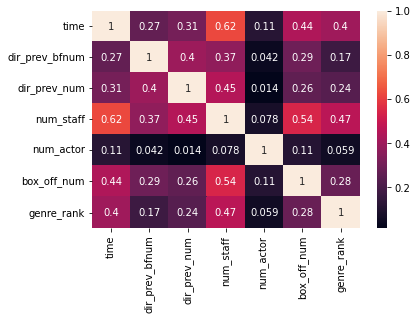

In [21]:
import seaborn as sns
sns.heatmap(train_data.corr(),annot=True)

In [22]:
train_data['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
         ... 
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, Length: 12, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


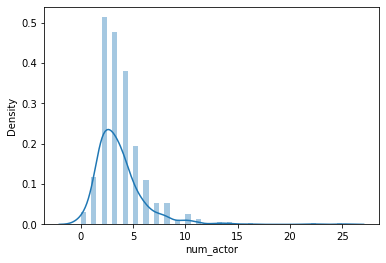

In [23]:
sns.distplot(train_data['num_actor'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


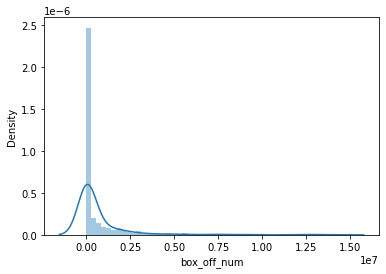

In [24]:
sns.distplot(train_data['box_off_num'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


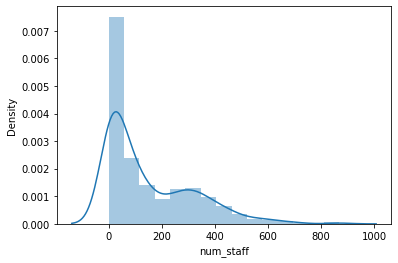

In [25]:
sns.distplot(train_data['num_staff'])

In [26]:
train_data['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [27]:
train_data['distributor'].nunique()

147

#데이터 전처리

##배급사별 영화 관객수 중위값 기준으로 배급사 랭크 인코딩

In [28]:
tr_nm_rank = train_data.groupby('distributor').box_off_num.median()
tr_nm_rank

distributor
BoXoo엔터테인먼트       2078.5
CJ             1084269.0
JK필름            688639.0
KBS미디어            7956.0
KT              167024.0
                 ...    
하준사                600.0
한국YWCA연합회           71.0
홀리가든              1778.5
화앤담이엔티          172196.5
휘엔터테인먼트            228.0
Name: box_off_num, Length: 147, dtype: float64

In [29]:
tr_nm_rank = train_data.groupby('distributor').box_off_num.median().reset_index(name='num_rank').sort_values(by ='num_rank')
tr_nm_rank

,distributor,num_rank
110,인피니티엔터테인먼트,2.0
15,고구마공작소,8.0
52,사람과사람들,42.0
97,위드시네마,46.0
19,나우콘텐츠,54.0
...,...,...
113,전망좋은영화사,1214237.0
105,이십세기폭스코리아,1422844.0
56,쇼박스,2138560.0
84,영구아트무비,2541603.0


In [30]:
tr_nm_rank['num_rank']=[i+1 for i in range(tr_nm_rank.shape[0])]
tr_nm_rank

,distributor,num_rank
110,인피니티엔터테인먼트,1
15,고구마공작소,2
52,사람과사람들,3
97,위드시네마,4
19,나우콘텐츠,5
...,...,...
113,전망좋은영화사,143
105,이십세기폭스코리아,144
56,쇼박스,145
84,영구아트무비,146


##최종 데이터 병합

In [31]:
train = pd.merge(train_data,tr_nm_rank,how='left')

In [32]:
test = pd.merge(test_data,tr_nm_rank,how='left')

In [33]:
train.isna().sum()

title           0
distributor     0
genre           0
release_time    0
time            0
               ..
num_staff       0
num_actor       0
box_off_num     0
genre_rank      0
num_rank        0
Length: 14, dtype: int64

In [34]:
test.fillna(0,inplace=True)

In [35]:
test.isna().sum()

title           0
distributor     0
genre           0
release_time    0
time            0
               ..
dir_prev_num    0
num_staff       0
num_actor       0
genre_rank      0
num_rank        0
Length: 13, dtype: int64

In [36]:
pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [37]:
pip install ngboost

     |████████████████████████████████| 348 kB 6.6 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=a8428b3abe5b8a5098fc6bc6dac1555c339a78d58ed62a31e99bf42f39da0818
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [38]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from ngboost import NGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

#모델링 데이터 구성

In [39]:
import numpy as np
X = train[['num_rank','time','num_staff','num_actor','genre_rank','screening_rat']]
y = np.log1p(train.box_off_num)   #타겟 값인 관객수를 로그변환

###상영등급은 더미 변수처리

In [40]:
X = pd.get_dummies(columns=['screening_rat'],data=X)

In [41]:
X

,num_rank,time,num_staff,num_actor,genre_rank,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,134,96,91,2,11,0,0,0,1
1,145,130,387,3,12,0,0,0,1
2,145,123,343,4,11,0,1,0,0
3,140,101,20,6,9,0,0,1,0
4,145,108,251,2,9,0,1,0,0
...,...,...,...,...,...,...,...,...,...
595,140,111,510,7,8,0,0,0,1
596,145,127,286,6,8,0,1,0,0
597,46,99,123,4,7,0,0,0,1
598,141,102,431,4,12,0,1,0,0


###출연 배우 수는 로그변환

In [42]:
X['num_actor'] = np.log1p(X['num_actor'])

###test 데이터세트도 데이터 처리

In [43]:
target = test[['num_rank','time','num_staff','num_actor','genre_rank','screening_rat']]
target = pd.get_dummies(columns=['screening_rat'],data=target)
target['num_actor'] = np.log1p(target['num_actor'])

###10fold 로 교차검증

In [44]:
kf = KFold(n_splits = 10, shuffle=True, random_state=42)

#5가지 모델 사용

##1) GradientBoostingRegressor

In [45]:
gbm = GradientBoostingRegressor(random_state=42)

In [46]:
rmse_list = []
gb_pred = np.zeros((test.shape[0]))

for tr_idx, val_idx in kf.split(X,y):
    tr_x,tr_y = X.iloc[tr_idx],y.iloc[tr_idx]
    val_x,val_y = X.iloc[val_idx],y.iloc[val_idx]

    gbm.fit(tr_x,tr_y)

    pred = np.expm1([0 if x<0 else x for x in gbm.predict(val_x)])   # kfold 내에 있는 test 세트로 예측
    sub_pred = np.expm1([0 if x<0 else x for x in gbm.predict(target)])   #target : (243,9) sub_pred : (243,)
    rmse = np.sqrt(mean_squared_error(val_y,pred))

    rmse_list.append(rmse)   #rmse_list 길이 : 10

    gb_pred += (sub_pred/10)

gb_pred = gb_pred + sub_pred/10

In [47]:
gb_pred.shape

(243,)

In [48]:
val_x.shape

(60, 9)

In [49]:
target.shape

(243, 9)

In [50]:
sub_pred.shape

(243,)

In [51]:
len(rmse_list)

10

In [52]:
rmse_list

[833799.7898958934,
 843326.1703815515,
 2580094.3543833084,
 1015979.3764714784,
 1548450.3688728388,
 1041278.3298725794,
 811791.6099649561,
 798780.6574496045,
 1294844.9626026177,
 975444.1672700263]

In [53]:
np.mean(rmse_list)

1174378.9787164854

##2)LGBMRegressor

In [54]:
lgbm = LGBMRegressor(random_state=518)

In [55]:
rmse_list =[]
lgb_pred = np.zeros((test.shape[0]))

for tr_idx, val_idx in kf.split(X,y):
    tr_x,tr_y = X.iloc[tr_idx],y.iloc[tr_idx]
    val_x,val_y = X.iloc[val_idx],y.iloc[val_idx]

    lgbm.fit(tr_x,tr_y)

    pred = np.expm1([0 if x<0 else x for x in lgbm.predict(val_x)])   # kfold 내에 있는 test 세트로 예측 pred : (60,)
    sub_pred = np.expm1([0 if x<0 else x for x in lgbm.predict(target)])   #target : (243,9) sub_pred : (243,)
    rmse = np.sqrt(mean_squared_error(val_y,pred))

    rmse_list.append(rmse)   #rmse_list 길이 : 10

    lgb_pred += (sub_pred/10)

In [56]:
rmse_list

[1373335.9947375148,
 1064517.178378358,
 856525.0589076066,
 1658133.3598553757,
 1690993.6101860264,
 992599.1273216873,
 788339.647057171,
 1194172.9237945492,
 890443.2349142678,
 1629090.3053761602]

In [57]:
np.mean(rmse_list)

1213815.0440528719

##3)XGBRegressor

In [58]:
xgb = XGBRegressor(random_state=518)

In [59]:
rmse_list =[]
xgb_pred = np.zeros((test.shape[0]))

for tr_idx, val_idx in kf.split(X,y):
    tr_x,tr_y = X.iloc[tr_idx],y.iloc[tr_idx]
    val_x,val_y = X.iloc[val_idx],y.iloc[val_idx]

    xgb.fit(tr_x,tr_y)

    pred = np.expm1([0 if x<0 else x for x in xgb.predict(val_x)])   # kfold 내에 있는 test 세트로 예측
    sub_pred = np.expm1([0 if x<0 else x for x in xgb.predict(target)])   #target : (243,9) sub_pred : (243,)
    rmse = np.sqrt(mean_squared_error(val_y,pred))

    rmse_list.append(rmse)   #rmse_list 길이 : 10

    xgb_pred += (sub_pred/10)

[10:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [60]:
rmse_list

[841653.7413457696,
 790203.7652057235,
 939123.0572183533,
 950318.8097929008,
 1918673.209870442,
 1154769.2083210028,
 791972.1495875735,
 776606.3308593461,
 852574.6192746705,
 1006298.1895694301]

In [61]:
np.mean(rmse_list)

1002219.3081045212

##4) RandomForestRegressor

In [62]:
rf = RandomForestRegressor(random_state=518)

In [63]:
rmse_list =[]
rf_pred = np.zeros((test.shape[0]))

for tr_idx, val_idx in kf.split(X,y):
    tr_x,tr_y = X.iloc[tr_idx],y.iloc[tr_idx]
    val_x,val_y = X.iloc[val_idx],y.iloc[val_idx]

    rf.fit(tr_x,tr_y)

    pred = np.expm1([0 if x<0 else x for x in rf.predict(val_x)])   # kfold 내에 있는 test 세트로 예측
    sub_pred = np.expm1([0 if x<0 else x for x in rf.predict(target)])   #target : (243,9) sub_pred : (243,)
    rmse = np.sqrt(mean_squared_error(val_y,pred))

    rmse_list.append(rmse)   #rmse_list 길이 : 10

    rf_pred += (sub_pred/10)

In [64]:
rmse_list

[770976.0973703703,
 925191.9716714872,
 750101.3378253161,
 965093.404198623,
 919336.0412238564,
 830071.587711673,
 806146.9226497009,
 937471.2660221107,
 747995.2597012457,
 1084333.1411847074]

In [65]:
np.mean(rmse_list)

873671.7029559091

In [66]:
rf_pred.shape

(243,)

##5) NGBRegressor

In [67]:
ngb = NGBRegressor(random_state=518)

In [68]:
rmse_list =[]
ngb_pred = np.zeros((test.shape[0]))

for tr_idx, val_idx in kf.split(X,y):
    tr_x,tr_y = X.iloc[tr_idx],y.iloc[tr_idx]
    val_x,val_y = X.iloc[val_idx],y.iloc[val_idx]

    ngb.fit(tr_x,tr_y)

    pred = np.expm1([0 if x<0 else x for x in ngb.predict(val_x)])   # kfold 내에 있는 test 세트로 예측
    sub_pred = np.expm1([0 if x<0 else x for x in ngb.predict(target)])   #target : (243,9) sub_pred : (243,)
    rmse = np.sqrt(mean_squared_error(val_y,pred))

    rmse_list.append(rmse)   #rmse_list 길이 : 10

    ngb_pred += (sub_pred/10)

[iter 0] loss=2.6200 val_loss=0.0000 scale=1.0000 norm=2.9523
[iter 100] loss=1.9566 val_loss=0.0000 scale=2.0000 norm=2.7106
[iter 200] loss=1.5812 val_loss=0.0000 scale=2.0000 norm=2.1869
[iter 300] loss=1.4423 val_loss=0.0000 scale=2.0000 norm=2.0889
[iter 400] loss=1.3728 val_loss=0.0000 scale=1.0000 norm=1.0177
[iter 0] loss=1.4109 val_loss=0.0000 scale=1.0000 norm=1.0784
[iter 100] loss=1.3259 val_loss=0.0000 scale=1.0000 norm=1.0088
[iter 200] loss=1.2861 val_loss=0.0000 scale=1.0000 norm=0.9874
[iter 300] loss=1.2477 val_loss=0.0000 scale=1.0000 norm=0.9666
[iter 400] loss=1.2146 val_loss=0.0000 scale=1.0000 norm=0.9510
[iter 0] loss=1.2155 val_loss=0.0000 scale=1.0000 norm=0.9573
[iter 100] loss=1.1626 val_loss=0.0000 scale=0.2500 norm=0.2299
[iter 200] loss=1.1501 val_loss=0.0000 scale=0.5000 norm=0.4558
[iter 300] loss=1.1396 val_loss=0.0000 scale=0.0312 norm=0.0283
[iter 400] loss=1.1367 val_loss=0.0000 scale=0.0020 norm=0.0018
[iter 0] loss=1.1707 val_loss=0.0000 scale=0.5

In [69]:
np.mean(rmse_list)

1422507.06065599

##6) CatBoostRegressor

In [70]:
cat = CatBoostRegressor(random_state=518,silent=True)

In [71]:
rmse_list =[]
cat_pred = np.zeros((test.shape[0]))

for tr_idx, val_idx in kf.split(X,y):
    tr_x,tr_y = X.iloc[tr_idx],y.iloc[tr_idx]
    val_x,val_y = X.iloc[val_idx],y.iloc[val_idx]

    cat.fit(tr_x,tr_y)

    pred = np.expm1([0 if x<0 else x for x in cat.predict(val_x)])   # kfold 내에 있는 test 세트로 예측
    sub_pred = np.expm1([0 if x<0 else x for x in cat.predict(target)])   #target : (243,9) sub_pred : (243,)
    rmse = np.sqrt(mean_squared_error(val_y,pred))

    rmse_list.append(rmse)   #rmse_list 길이 : 10

    cat_pred += (sub_pred/10)

In [72]:
np.mean(rmse_list)

1075600.9209088846

#최종 예측 결과 블렌딩

In [73]:
submission_data['box_off_num'] = (gb_pred+lgb_pred+xgb_pred+rf_pred+ngb_pred+cat_pred)/6

In [74]:
submission_data.sort_values(by='box_off_num')

,title,box_off_num
130,댄서김의 은밀한 교수법,1.246093e+01
39,REC 알이씨,1.490228e+01
139,화려한 외출,2.028183e+01
173,옹녀뎐,2.187776e+01
65,엄마는 창녀다,2.778850e+01
...,...,...
135,용의자,4.125847e+06
229,베테랑,4.328142e+06
142,박수건달,5.078663e+06
179,군도: 민란의 시대,6.448530e+06


In [76]:
submission_data.to_csv('1231(6).csv',index=False)